In [1]:
# Importing all the packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
from scipy import stats
import seaborn as sns
from scipy.stats import norm,skew
import re
import codecs

In [2]:
dataset=pd.read_csv("MS Dhoni ODI Batting.csv")
dataset

,Match,Date,Match No.,Runs,Balls,Mins,4s,6s,Ct,St
0,India in Bangladesh 2015 (2nd ODI),21st June 2015,264,47.0,75.0,112,3,-,1,0
1,India in Bangladesh 2015 (1st ODI),18th June 2015,263,5.0,7.0,13,-,-,0,0
2,ICC World Cup 2014/15 (Semi-Final),26th March 2015,262,65.0,65.0,94,3,2,0,0
3,ICC World Cup 2014/15 (Quarter-Final),19th March 2015,261,6.0,11.0,0,-,-,4,0
4,ICC World Cup 2014/15 (Pool B),14th March 2015,260,85.0,76.0,113,8,2,2,0
...,...,...,...,...,...,...,...,...,...,...
259,"Pakistan in India: 2nd ODI, 2004/05",5-Apr-05,5,148.0,123.0,155,15,4,2,0
260,"Pakistan in India: 1st ODI, 2004/05",2-Apr-05,4,3.0,7.0,-,-,-,0,0
261,"India in Bangladesh: 3rd ODI, 2004/05",27-Dec-04,3,7.0,2.0,2,-,1,3,2
262,"India in Bangladesh: 2nd ODI, 2004/05",26-Dec-04,2,12.0,11.0,16,2,-,1,0


In [3]:
# Checking for NAN values
dataset.isnull().sum()

Match        32
Date         32
Match No.     0
Runs         34
Balls        34
Mins         39
4s           34
6s           34
Ct            0
St            0
dtype: int64

In [4]:
# Since certain rows of Runs column have NULL values I am Dropping rows which contain NAN values for simplicity
dataset.dropna(inplace=True)
# Making sure no Null values are present
dataset.isnull().sum()

Match        0
Date         0
Match No.    0
Runs         0
Balls        0
Mins         0
4s           0
6s           0
Ct           0
St           0
dtype: int64

### QUESTION A:

Mean : 38.014925373134325
Median : 33.0
Mode : 2.0


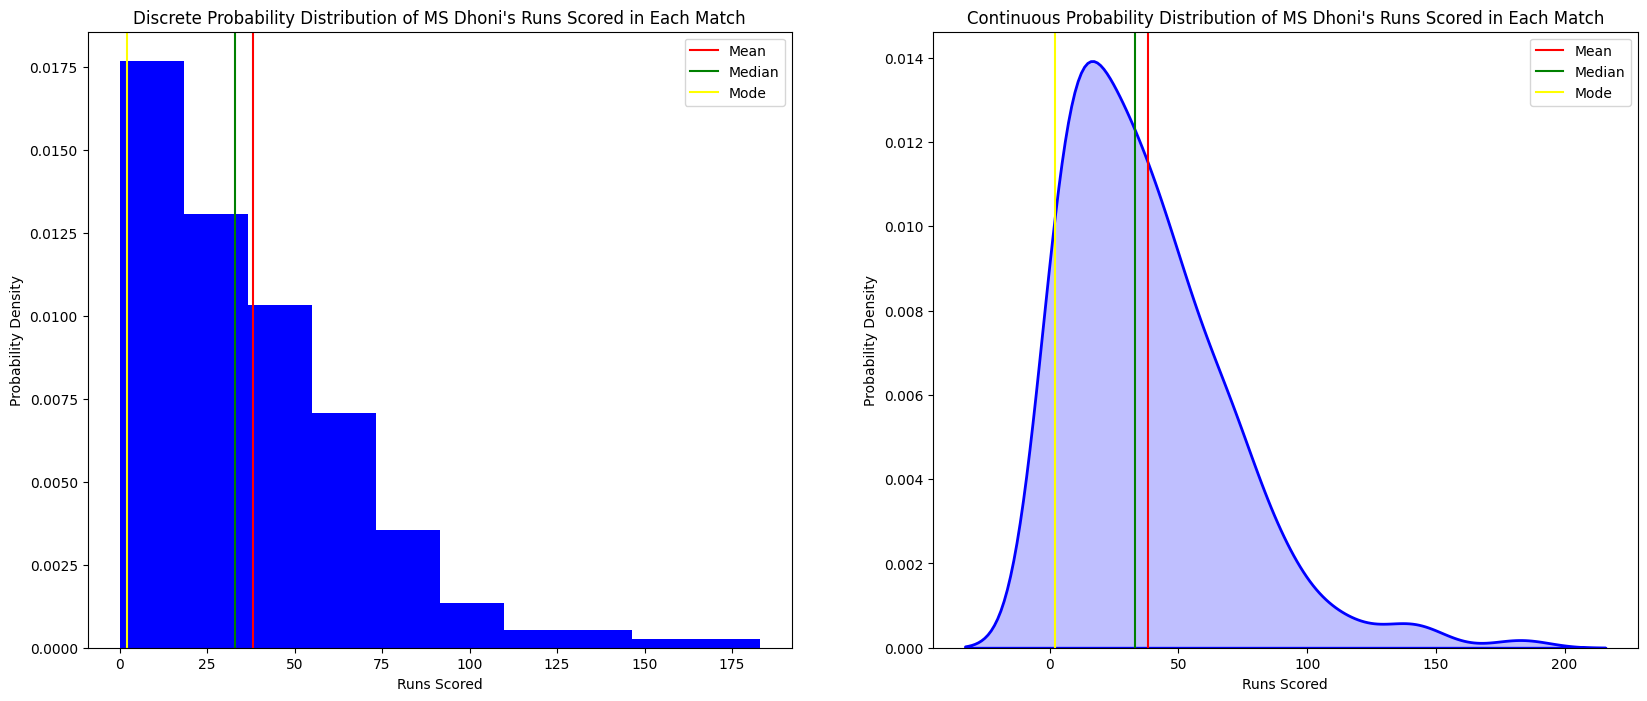

In [5]:
# Sample data for MS Dhoni's runs scored in each match
runs_scored = list(dataset['Runs'])
#print(runs_scored)

# Calculating the mean, median and mode values
mean = np.mean(runs_scored)
median = np.median(runs_scored)
std=np.std(runs_scored)
mode = Counter(runs_scored).most_common(1)[0][0]

print("Mean :",mean)
print("Median :",median)
print("Mode :",mode)

plt.figure(figsize=(20,8))  
plt.subplot(1,    2,       1) 
# Plotting the histogram
plt.hist(runs_scored, bins=10, density=True, color='blue')
plt.axvline(mean, color='red', label='Mean')
plt.axvline(median, color='green', label='Median')
plt.axvline(mode, color='yellow', label='Mode')


# Annotating the mean, median, and mode values
plt.annotate(f'Mean: {mean:.2f}', (mean + 5, 0.1), color='red')
plt.annotate(f'Median: {median:.2f}', (median + 5, 0.08), color='green')
plt.annotate(f'Mode: {mode:.2f}', (mode + 5, 0.06), color='yellow')

# Adding labels and title to the plot
plt.xlabel('Runs Scored')
plt.ylabel('Probability Density')
plt.title('Discrete Probability Distribution of MS Dhoni\'s Runs Scored in Each Match')
plt.legend()

plt.subplot(1,2, 2)

sns.kdeplot(runs_scored,fill=True, color='b',linewidth=2)
plt.axvline(mean, color='red', label='Mean')
plt.axvline(median, color='green', label='Median')
plt.axvline(mode, color='yellow', label='Mode')

plt.xlabel('Runs Scored')
plt.ylabel('Probability Density')
plt.title('Continuous Probability Distribution of MS Dhoni\'s Runs Scored in Each Match')
plt.legend()


# Displaying the plot
plt.show()



- Here I have plotted Probability density function w.r.t runs scored because the probability density is always a function of x-axis. So in the x-axis we have to plot a dependent variable. 

- Also if we plot the pdf wrt runs scored we get an overall idea on his career and his average runs.

- Also in the question it is given to annotate Mean, Median and Mode values. So to do that i need to have x_axis as runs scored.

In [6]:
# Printing skewness and kurtosis
print("Skewness: ",stats.skew(runs_scored, axis = 0, bias = True))
print("Kurtosis: ",stats.kurtosis(runs_scored, axis = 0, bias = True))

Skewness:  1.3366227575741294
Kurtosis:  2.4876914917209287


## Observations:

- The mean of of the runs scored is 38 whereas the median is 33. So from this we can conclude that Ms. Dhone is performing lower than his average score for greater than 50% of the matches.

- From the probability distribution curve as well the skewness values it can be found that the dataset is positively skewed.

- Since the kurtosis value is +ve we can say that the dataset has positive kurtosis and there is a huge chance for the presence of outliers.

- The distribution is heavily clustered below the mean score in this case.

### QUESTION B :

In [7]:
# Changing the dataset
dataset.dtypes
dataset['Date'] = dataset['Date'].astype('|S')
Date =list(dataset.Date)
Date = [x.decode('utf-8') for x in Date]
c=0
for i in Date:
    Date[c]=i.split()
    if(len(Date[c])>1):
        Date[c]=int(Date[c][2])
        if(Date[c]<20):
            Date[c]+=2000
    else:
        Date[c]=i.split('-')
        Date[c]=int(Date[c][2])
        if(Date[c]<20):
            Date[c]+=2000
    c=c+1

#Adding Year column

dataset['Year']=Date
dataset

,Match,Date,Match No.,Runs,Balls,Mins,4s,6s,Ct,St,Year
0,India in Bangladesh 2015 (2nd ODI),b'21st June 2015',264,47.0,75.0,112,3,-,1,0,2015
1,India in Bangladesh 2015 (1st ODI),b'18th June 2015',263,5.0,7.0,13,-,-,0,0,2015
2,ICC World Cup 2014/15 (Semi-Final),b'26th March 2015',262,65.0,65.0,94,3,2,0,0,2015
3,ICC World Cup 2014/15 (Quarter-Final),b'19th March 2015',261,6.0,11.0,0,-,-,4,0,2015
4,ICC World Cup 2014/15 (Pool B),b'14th March 2015',260,85.0,76.0,113,8,2,2,0,2015
...,...,...,...,...,...,...,...,...,...,...,...
259,"Pakistan in India: 2nd ODI, 2004/05",b'5-Apr-05',5,148.0,123.0,155,15,4,2,0,2005
260,"Pakistan in India: 1st ODI, 2004/05",b'2-Apr-05',4,3.0,7.0,-,-,-,0,0,2005
261,"India in Bangladesh: 3rd ODI, 2004/05",b'27-Dec-04',3,7.0,2.0,2,-,1,3,2,2004
262,"India in Bangladesh: 2nd ODI, 2004/05",b'26-Dec-04',2,12.0,11.0,16,2,-,1,0,2004


In [8]:
# storing Years
Year=[i for i in range(2004,2016)]
print(Year)

[2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015]


In [9]:
mean_runs_scored = []
median_runs_scored = []
mode_runs_scored = []
std_dev_runs_scored = []

In [10]:
for i in Year:
    runs_scored=list(dataset[i==dataset.Year]['Runs'])
    mean_runs_scored.append(np.mean(runs_scored))
    median_runs_scored.append(np.median(runs_scored))
    mode_runs_scored.append(Counter(runs_scored).most_common(1)[0][0])
    std_dev_runs_scored.append(np.std(runs_scored))

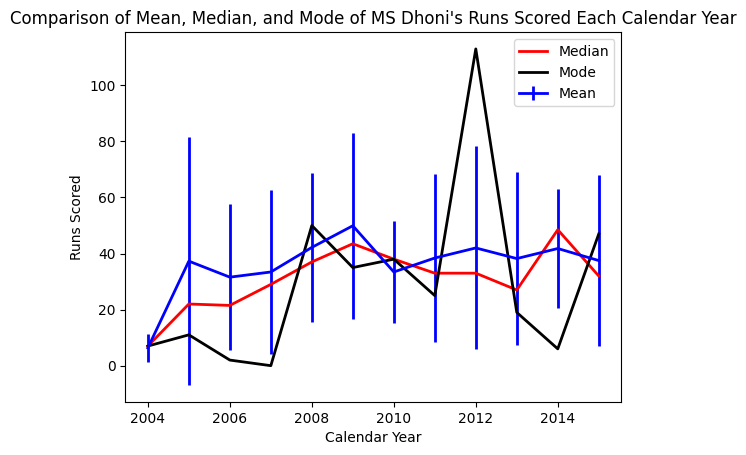

In [11]:
# Plotting the mean values with error bars
plt.errorbar(Year, mean_runs_scored, yerr=std_dev_runs_scored, color='blue', label='Mean',linewidth=2)

# Plotting the median values
plt.plot(Year, median_runs_scored, color='red', label='Median',linewidth=2)

# Plotting the mode values
plt.plot(Year, mode_runs_scored, color='black', label='Mode',linewidth=2)

# Adding labels and title to the plot
plt.xlabel('Calendar Year')
plt.ylabel('Runs Scored')
plt.title('Comparison of Mean, Median, and Mode of MS Dhoni\'s Runs Scored Each Calendar Year')
plt.legend()

# Displaying the plot
plt.show()


## Observations :

- The variation from the mean or standard deviation is very high throuhout his career.

- His highest runs scored is in the year 2012.

- The median value of runs scored is less than it's mean value for majority of the years. So we can say that he is performing lower than his average for most of the years.

### QUESTION C :

In [12]:
dataset['Match'] = dataset['Match'].astype('|S')
Match =list(dataset['Match'])
Match=[x.decode('utf-8') for x in Match]
dataset['Match']=Match
dataset

,Match,Date,Match No.,Runs,Balls,Mins,4s,6s,Ct,St,Year
0,India in Bangladesh 2015 (2nd ODI),b'21st June 2015',264,47.0,75.0,112,3,-,1,0,2015
1,India in Bangladesh 2015 (1st ODI),b'18th June 2015',263,5.0,7.0,13,-,-,0,0,2015
2,ICC World Cup 2014/15 (Semi-Final),b'26th March 2015',262,65.0,65.0,94,3,2,0,0,2015
3,ICC World Cup 2014/15 (Quarter-Final),b'19th March 2015',261,6.0,11.0,0,-,-,4,0,2015
4,ICC World Cup 2014/15 (Pool B),b'14th March 2015',260,85.0,76.0,113,8,2,2,0,2015
...,...,...,...,...,...,...,...,...,...,...,...
259,"Pakistan in India: 2nd ODI, 2004/05",b'5-Apr-05',5,148.0,123.0,155,15,4,2,0,2005
260,"Pakistan in India: 1st ODI, 2004/05",b'2-Apr-05',4,3.0,7.0,-,-,-,0,0,2005
261,"India in Bangladesh: 3rd ODI, 2004/05",b'27-Dec-04',3,7.0,2.0,2,-,1,3,2,2004
262,"India in Bangladesh: 2nd ODI, 2004/05",b'26-Dec-04',2,12.0,11.0,16,2,-,1,0,2004


In [13]:
ICC_runs=[]

In [14]:
for i in Year:
    df=dataset[i==dataset.Year]
    ic=df['Match']
    runs_scored=[]
    for j in ic:
        if 'ICC' in j:
           runs_scored.append(float(df[j==df.Match]['Runs']))
    ICC_runs.append(runs_scored)
print(ICC_runs)

[[], [], [28.0, 51.0, 7.0], [0.0, 29.0, 0.0], [], [3.0], [], [91.0, 25.0, 7.0, 22.0], [], [0.0], [], [65.0, 6.0, 85.0]]


In [15]:
mean_runs_ICC=[]
std_ICC=[]

In [16]:
c=0
for i in Year:
    temp=ICC_runs[c]
    print(temp)
    if(len(temp)==0):
        mean_runs_ICC.append(0)
        std_ICC.append(0)
    else:
        mean_runs_ICC.append(np.mean(temp))
        std_ICC.append(np.std(temp))
    c=c+1
print(mean_runs_ICC)
print(std_ICC)

[]
[]
[28.0, 51.0, 7.0]
[0.0, 29.0, 0.0]
[]
[3.0]
[]
[91.0, 25.0, 7.0, 22.0]
[]
[0.0]
[]
[65.0, 6.0, 85.0]
[0, 0, 28.666666666666668, 9.666666666666666, 0, 3.0, 0, 36.25, 0, 0.0, 0, 52.0]
[0, 0, 17.96910929592474, 13.67073110293992, 0, 0.0, 0, 32.33709170596515, 0, 0.0, 0, 33.53605025441527]


#### Comments

- In the dataset if I have found out that there are no values for the matches or there are no ICC tournaments in that year, for that case I have taken the mean and standard deviation values of runs scored to be zero for that Year.

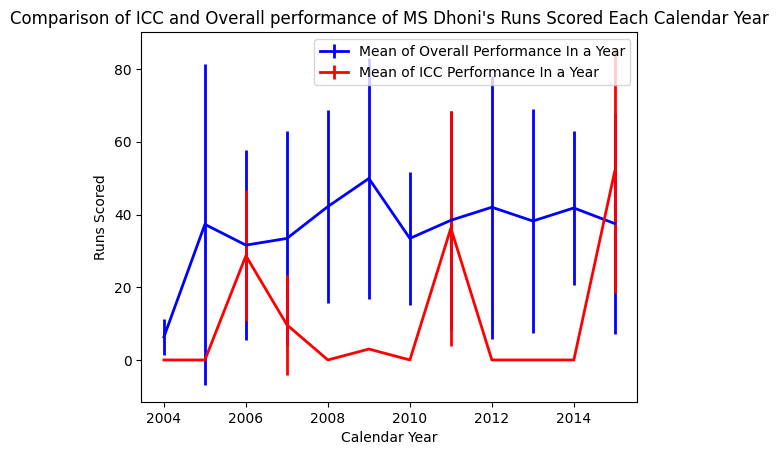

In [17]:
# Plotting the mean values with error bars
plt.errorbar(Year, mean_runs_scored, yerr=std_dev_runs_scored, color='blue', label='Mean of Overall Performance In a Year',linewidth=2)

# Plotting the median values
plt.errorbar(Year, mean_runs_ICC, yerr=std_ICC, color='red', label='Mean of ICC Performance In a Year',linewidth=2)

# Adding labels and title to the plot
plt.xlabel('Calendar Year')
plt.ylabel('Runs Scored')
plt.title('Comparison of ICC and Overall performance of MS Dhoni\'s Runs Scored Each Calendar Year')
plt.legend()

# Displaying the plot
plt.show()


### Observations:

- It can be seen from the above plot that Ms Dhoni underperforms in ICC tournament as the means for ICC are much lower than than his overall performance Means.

- Also the sample data is very less as ICC events are very small in number so it is very difficult to accurately compare with his overall performance.